## ASSIGNMENT-3

## Mayank Bajaj
## 210010039

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math as math

### Question 1

For flow over a cylindrical surface we can simulate by addition a freestream and a doublet

$\Phi= U_\infty z + \frac{U_\infty R^2}{z}$

$\frac{d\Phi}{dz}= u-iv = U_\infty - \frac{U_\infty R^2}{z^2}$

comparing real and imaginary parts and putting z=x + iy and then putting x=a$cos(\theta)$ and y=a$sin(\theta)$, where a is the radius of the cylinder

$u=2U_\infty sin^2(\theta)$

$v=-U_\infty sin(2\theta)$

$V= \sqrt[2]{u^2 + v^2}$

$Cp=\frac{P-P_\infty}{0.5 \rho U_\infty ^2}= 1-\frac{V^2}{U_\infty ^2}$

In [2]:
def cylinder_flow(radius,theta,stream_vel):
    u=2*stream_vel*np.sin(np.radians(theta))**2
    v=-stream_vel*np.sin(np.radians(2*theta))
    return u,v

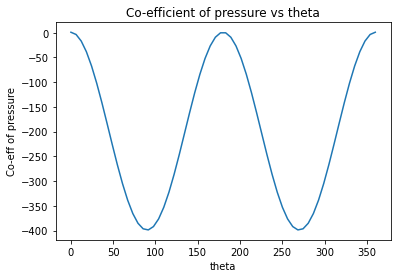

In [3]:
theta=np.mgrid[0:360:60j]
u,v=cylinder_flow(1,theta,10)
V=np.sqrt(u*u+v*v)
Cp=1-(V*V)
plt.plot(theta,Cp)
plt.title('Co-efficient of pressure vs theta')
plt.xlabel('theta')
plt.ylabel('Co-eff of pressure');

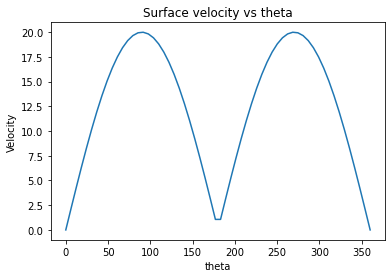

In [4]:
theta=np.mgrid[0:360:60j]
u,v=cylinder_flow(1,theta,10)
V=np.sqrt(u*u+v*v)
Cp=1-(V*V)
plt.plot(theta,V)
plt.title('Surface velocity vs theta')
plt.xlabel('theta')
plt.ylabel('Velocity');

### Question 2

For flow over a rotating cylindrical surface we can simulate by addition a freestream, a doublet and a point vortex at origin

$\Phi= \phi + i\psi = U_\infty z + \frac{U_\infty R^2}{z} - i\frac{\gamma}{2\pi} log(z)$

$\phi=Re(\Phi)$ and $\psi=Im(\Phi)$

In [5]:
def rotating_cylinder(x,y,gamma,radius,stream_vel):
    z=x+1j*y
    cap_phi=stream_vel*z+(stream_vel*radius*radius/z)-(1j*gamma*np.log(z)/(2*np.pi))
    return cap_phi

In [6]:
def differentiated_phi(x,y,gamma,radius,stream_vel):
    z=x+1j*y
    d_phi=stream_vel-(stream_vel*radius*radius/(z*z))-(1j*gamma/(2*np.pi*z))
    return d_phi

### Question 3

In [7]:
def plot_streamlines(radius,x,y,stream_vel,gamma):
    psi=np.imag(rotating_cylinder(x,y,gamma,radius,stream_vel))
    psi[x*x+y*y<1]=0
    plt.contour(x,y,psi,levels=60)
    plt.axis('equal')

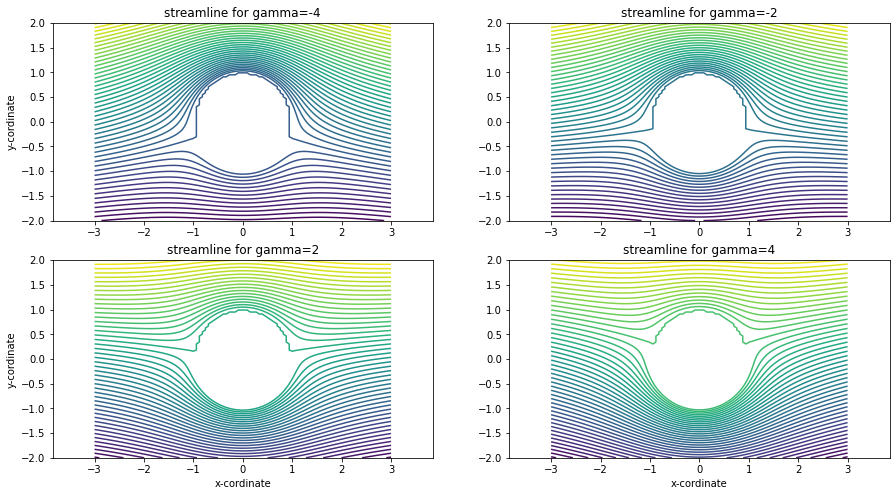

In [8]:
x,y=np.mgrid[-3:3:100j,-2:2:100j]
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plot_streamlines(1,x,y,1,-4)
plt.title("streamline for gamma=-4")
plt.ylabel('y-cordinate')
plt.subplot(2,2,2)
plot_streamlines(1,x,y,1,-2)
plt.title("streamline for gamma=-2")
plt.subplot(2,2,3)
plot_streamlines(1,x,y,1,2)
plt.title("streamline for gamma=2")
plt.xlabel('x-cordinate')
plt.ylabel('y-cordinate')
plt.subplot(2,2,4)
plot_streamlines(1,x,y,1,4)
plt.title("streamline for gamma=4")
plt.xlabel('x-cordinate');

### Question 4

$\frac{d\Phi}{dz}= u-iv = U_\infty - \frac{U_\infty R^2}{z^2} - i\frac{\gamma}{2\pi z}$

From Bernoulli's equation 

$P+ \frac{1}{2} \rho V^2 = P_\infty + \frac{1}{2} \rho U_\infty^2$

Using this we can take out pressure field. For ease of computation I have taken out P-P$_\infty$ instead

In [9]:
def velocity(radius,x,y,stream_vel,gamma):
    u=np.real(differentiated_phi(x,y,gamma,radius,stream_vel))
    v=-np.imag(differentiated_phi(x,y,gamma,radius,stream_vel))
    V=np.abs(differentiated_phi(x,y,gamma,radius,stream_vel))
    return V

In [10]:
def pressure_field(radius,x,y,stream_vel,gamma):
    V=velocity(radius,x,y,stream_vel,gamma)
    P=0.5*1000*stream_vel*stream_vel-0.5*1000*V*V
    P[x*x+y*y<1]=0
    return P

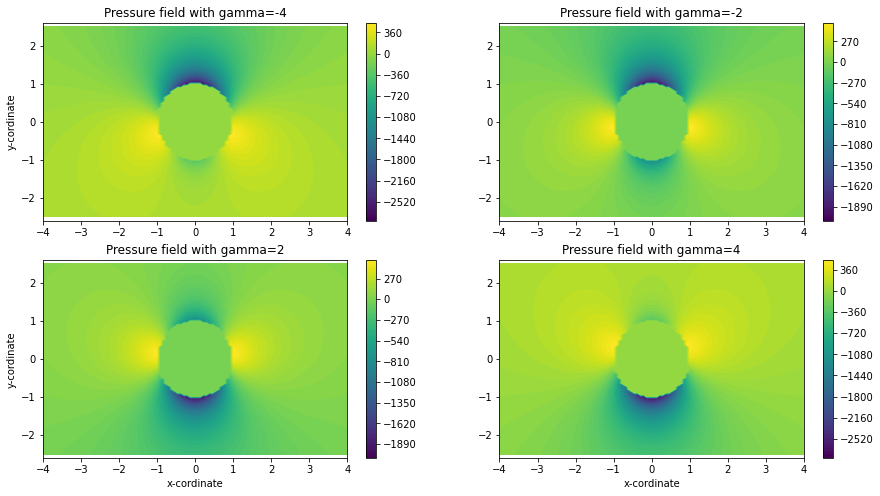

In [11]:
x,y=np.mgrid[-4:4:100j,-2.5:2.5:100j]
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
P=pressure_field(1,x,y,1,-4)
plt.contourf(x,y,P,levels=100)
plt.colorbar()
plt.axis('equal')
plt.title("Pressure field with gamma=-4")
plt.ylabel('y-cordinate')
plt.subplot(2,2,2)
P=pressure_field(1,x,y,1,-2)
plt.contourf(x,y,P,levels=100)
plt.colorbar()
plt.axis('equal')
plt.title("Pressure field with gamma=-2")
plt.subplot(2,2,3)
P=pressure_field(1,x,y,1,2)
plt.contourf(x,y,P,levels=100)
plt.colorbar()
plt.axis('equal')
plt.title("Pressure field with gamma=2")
plt.xlabel('x-cordinate')
plt.ylabel('y-cordinate')
plt.subplot(2,2,4)
P=pressure_field(1,x,y,1,4)
plt.contourf(x,y,P,levels=100)
plt.colorbar()
plt.axis('equal')
plt.title("Pressure field with gamma=4")
plt.xlabel('x-cordinate');

### Question 5

$\frac{d\Phi}{dz}= u-iv = U_\infty - \frac{U_\infty R^2}{z^2} - i\frac{\gamma}{2\pi z}$

Using the same we write z=x+$i$y and put x=a$cos(\theta)$ and y=a$sin(\theta)$

Thus we get the relation of the Velocity magnitude($V$)= $\sqrt[2]{u^2 + v^2}$ in terms of $\theta$

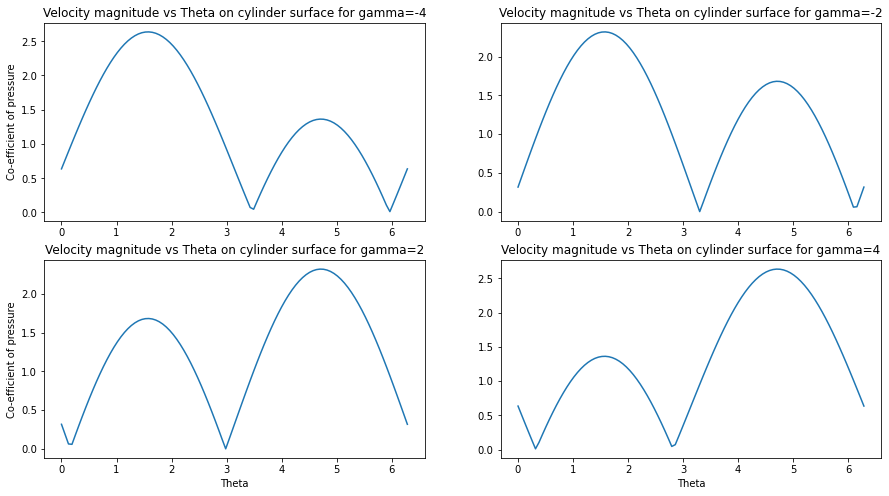

In [12]:
theta=np.mgrid[0:2*np.pi:100j]
x=np.cos(theta)
y=np.sin(theta)
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
V=velocity(1,x,y,1,-4)
plt.plot(theta,V)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=-4')
plt.ylabel('Co-efficient of pressure')
plt.subplot(2,2,2)
V=velocity(1,x,y,1,-2)
plt.plot(theta,V)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=-2')
plt.subplot(2,2,3)
V=velocity(1,x,y,1,2)
plt.plot(theta,V)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=2')
plt.xlabel('Theta')
plt.ylabel('Co-efficient of pressure')
plt.subplot(2,2,4)
V=velocity(1,x,y,1,4)
plt.plot(theta,V)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=4')
plt.xlabel('Theta');

### Question 6

Using Bernoulli's equation again:

$P+ \frac{1}{2} \rho V^2 = P_\infty + \frac{1}{2} \rho U_\infty^2$

$P - P_\infty =\frac{1}{2} \rho U_\infty^2- \frac{1}{2} \rho V^2$

$\frac{P - P_\infty}{\frac{1}{2} \rho U_\infty^2}= 1 - \frac{V^2}{U_\infty^2}$

therefore, $ C_p = 1 - \frac{V^2}{U_\infty^2}$

In [13]:
def pressure_coeff(radius,stream_vel,gamma):
    theta=np.mgrid[0:2*np.pi:100j]
    x=np.cos(theta)
    y=np.sin(theta)
    V=velocity(1,x,y,1,gamma)
    Cp=1-(V*V/(stream_vel*stream_vel))
    plt.plot(theta,Cp)

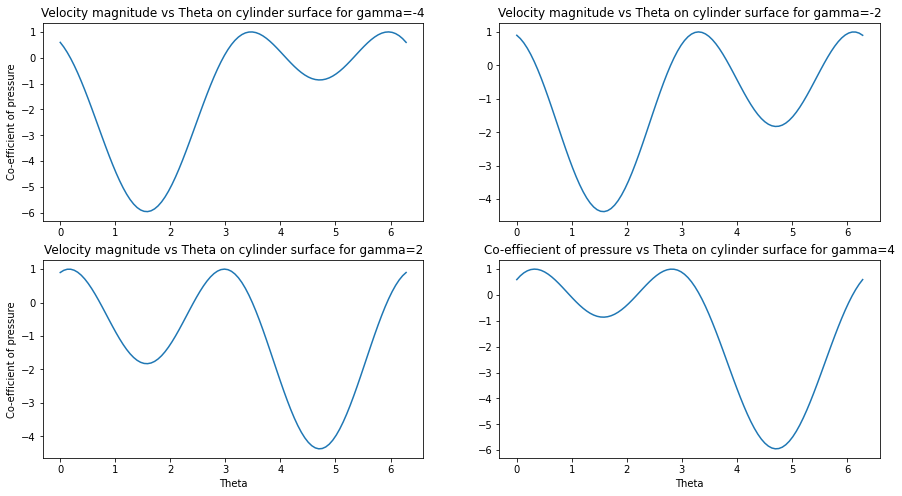

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
pressure_coeff(1,1,-4)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=-4')
plt.ylabel('Co-efficient of pressure')
plt.subplot(2,2,2)
pressure_coeff(1,1,-2)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=-2')
plt.subplot(2,2,3)
pressure_coeff(1,1,2)
plt.title('Velocity magnitude vs Theta on cylinder surface for gamma=2')
plt.xlabel('Theta')
plt.ylabel('Co-efficient of pressure')
plt.subplot(2,2,4)
pressure_coeff(1,1,4)
plt.title('Co-effiecient of pressure vs Theta on cylinder surface for gamma=4')
plt.xlabel('Theta');

### Question 7

For lift we take the sin component:

$C_l = \sum_{\theta=0}^{2\pi} C_p R sin(\theta) \delta \theta$

For Drag we use the cos component:

$C_d = \sum_{\theta=0}^{2\pi} C_p R cos(\theta) \delta \theta$


In [15]:
def pressure(radius,x,y,stream_vel,gamma):
    V=velocity(radius,x,y,stream_vel,gamma)
    Cp=1-(V*V/(stream_vel*stream_vel))
    return Cp

In [16]:
theta=np.mgrid[0:2*np.pi:360j]
lift=0
for i in theta:
    x=np.cos(i)
    y=np.sin(i)
    Cp=pressure(1,x,y,1,-4)
    lift=lift-Cp*((np.sin(i)+np.sin(i+1))/2)*2*np.pi/360
print("Co-efficient of lift=",lift)     

Co-efficient of lift= 6.139727628600481


In [17]:
theta=np.mgrid[0:2*np.pi:360j]
drag=0
for i in theta:
    x=np.cos(i)
    y=np.sin(i)
    Cp=pressure(1,x,y,1,-4)
    drag=drag-Cp*np.cos(i)*2*np.pi/360
print("Co-efficient of drag=",drag)   

Co-efficient of drag= -0.010379739493635565
